# Тестовое задание #2

Пусть популяция является станартной моделью Райта-Фишера. То есть
- Количество особей = $N$
- Все особи дилоидны
- Нет мутаций, миграций и других эволюционных процессов
- Скрещивание случайное и независимое

**Задание**. Пусть в модели Райта-Фишера есть два аллеля - $A$ и $a$. Прошло $n$ поколений. Методом Монте-Карло установить, в каком проценте случаев происходит фиксация аллеля $A$. 

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')

In [39]:
X = np.array([[-3, -1, -1, 1, 1, 3], [-4, -2, 0, 0, 2, 4]])
V = np.array([[0.59, -0.81], 
              [0.81, 0.59]])

X.T.dot(V)

array([[-5.01,  0.07],
       [-2.21, -0.37],
       [-0.59,  0.81],
       [ 0.59, -0.81],
       [ 2.21,  0.37],
       [ 5.01, -0.07]])

In [28]:
N = 100                 # количество особей в поколении
AF = 0.9                # доля аллеля А
GENERATIONS_NUM = 50    # количество поколений
SAMLING_NUM = 10_000
SEED = 42

In [41]:
def generate_population(allele_freq):
    return np.random.binomial(n=1, p=allele_freq, size=N)


def fixation_event(num_individuals: int = 100,
                   num_generations: int = 50,
                   allele_frequency: float = 0.5
                   ):

    fixation_A_event = 0

    population = generate_population(allele_frequency)

    for generation_idx in range(1, num_generations):
        freq_A = np.sum(population) / num_individuals

        if np.sum(population) == num_individuals:
            fixation_A_event = 1
            break

        # update population
        population = generate_population(freq_A)
    
    return fixation_A_event

def population_sampling(sampling_num: int = 10_000, 
                        num_individuals: int = 100, 
                        num_generations: int = 50, 
                        allele_frequency: float = 0.5):

    fixation_events_num = 0

    for _ in range(sampling_num):

        fixation = fixation_event(num_individuals=num_individuals,
                           num_generations=num_generations,
                           allele_frequency=allele_frequency)
        fixation_events_num += fixation
    
    return fixation_events_num / sampling_num
    

In [42]:
np.random.seed(SEED)

population_sampling(sampling_num=SAMLING_NUM, 
                    num_individuals=N, 
                    num_generations=GENERATIONS_NUM, 
                    allele_frequency=AF
                    )

0.651

In [45]:
generations = np.linspace(10, 1_000, 100)
fixation_frequencies = []

for generation_count in tqdm(generations, colour="CYAN"):

    fixation_freq = population_sampling(sampling_num=SAMLING_NUM,
                                        num_individuals=N, 
                                        num_generations=int(generation_count), 
                                        allele_frequency=AF)

    fixation_frequencies.append(fixation_freq)

100%|██████████| 100/100 [10:36<00:00,  6.36s/it]


Text(0, 0.5, 'Fixation of A frequency')

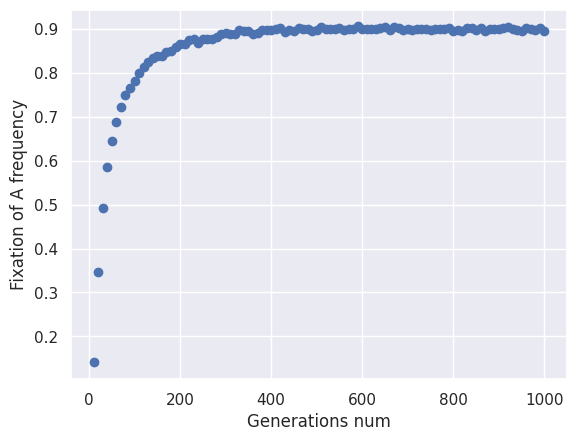

In [46]:
plt.scatter(generations, fixation_frequencies)
plt.xlabel('Generations num')
plt.ylabel('Fixation of A frequency')

In [47]:
allele_frequencies = np.linspace(0.0, 1.0, 0.05)
fixation_frequencies = []

for af in tqdm(generations, colour="CYAN"):

    fixation_freq = population_sampling(sampling_num=SAMLING_NUM,
                                        num_individuals=N, 
                                        num_generations=GENERATIONS_NUM, 
                                        allele_frequency=af)

    fixation_frequencies.append(fixation_freq)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
plt.scatter(allele_frequencies, fixation_frequencies)
plt.xlabel('AF')
plt.ylabel('Fixation of A frequency')